In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [2]:
start = dt.datetime(2020, 1, 1)
data = pdr.get_data_yahoo("NFLX", start)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,324.920013,321.089996,322.000000,323.570007,3713300,323.570007
2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800,329.809998
2020-01-03,329.859985,325.529999,326.779999,325.899994,3806900,325.899994
2020-01-06,336.359985,321.200012,323.119995,335.829987,5663100,335.829987
2020-01-07,336.700012,330.299988,336.470001,330.750000,4703200,330.750000


In [11]:
hight_low = data['High'] - data['Low']
high_close_previous = data['High'] - data['Close'].shift() #shift fo previous value
low_cp = np.abs((data['Low']) - data['Close'].shift())

In [23]:
df = pd.concat([hight_low, high_close_previous, low_cp], axis=1)

In [28]:
true_range = np.max(df, axis=1) #axis helps to show them the daa in a proper frame

In [29]:
true_range

Date
2019-12-31     3.830017
2020-01-02     6.410004
2020-01-03     4.329987
2020-01-06    15.159973
2020-01-07     6.400024
                ...    
2022-01-24    46.040009
2022-01-25    22.579987
2022-01-26    26.040009
2022-01-27    35.099976
2022-01-28    14.900024
Length: 525, dtype: float64

In [56]:
avg_true_range = true_range.rolling(14).mean() #what is rolling - taking a window of 14 values here

In [62]:
avg_true_range

Date
2019-12-31          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
                ...    
2022-01-24    28.692145
2022-01-25    28.961430
2022-01-26    28.967143
2022-01-27    29.652141
2022-01-28    29.629998
Length: 525, dtype: float64

In [75]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


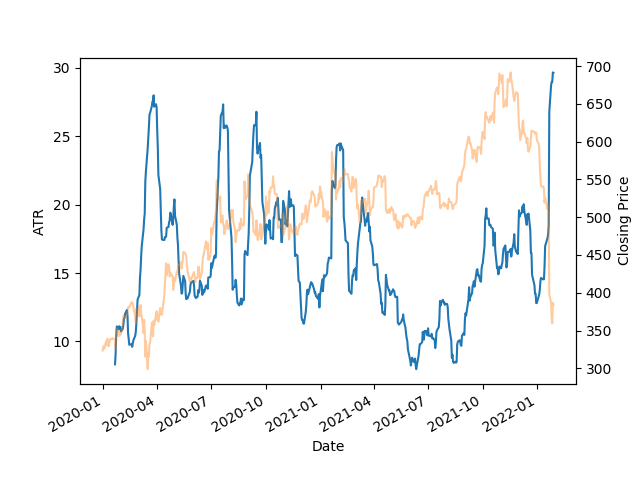

Text(0, 0.5, 'Closing Price')

In [78]:
figure, axis = plt.subplots()
avg_true_range.plot(ax=axis)
ax2 = data["Close"].plot(ax=axis, secondary_y=True, alpha=.4) #secondary_y is for making the plot at the same y axis
axis.set_ylabel("ATR")
ax2.set_ylabel("Closing Price")
#in this below chart volatile means when the avg true range is going up but the closing price is going down is called volatile
#or risky